# Report 5: Classification of Handwritten Characters Using Features Engineering
#### By : Dipen Chovatiya

## l. Introduction 
This report focuses on classifying different handwritten characters using Features Engineering. We have around 1000 images of different handwritten characters from different students from the class. Character set includes handwritten numbers from 0 to 9 , (-) dash, (.) period and alphabet 'm'.We will first find features from our character set and then plot them into feature space.Then we will divide this feature space into different regions, each of this region corresponds to a specific character. In this report we will not use any advanced machine learning packages provided by python. Rather we will use some of the basic packages such as numpy and Image to achieve this task.

### Feature Engineering
Feature Engineering is a process which defines a model for learning using the known features of the data.In this type of models we reach our goal by analyzing different features from the dataset.Efficiency of such models are increased by increasing the number of features.

## ll. Importing Necessary Packages

In [1]:
%pylab inline
from PIL import Image  # For handling image related task. such as open,preview and create image. 
import glob # Used for retriving all the file using matching certain pattern.
import numpy as np # Add various features for array , matrices and other high-level mathematics functions.

Populating the interactive namespace from numpy and matplotlib


## lll. Extracting Images and finding features

### Extracting images

Lets first extract all images of handwritten characters from the pngs folder using glob.

In [2]:
pngs = sorted( glob.glob('pngs/*.png') )

The names of the images were set with an "_#" referring to their actual representation to make it easier for us to handle them. 

### Setting color for each character
Now lets assign each image with different color so we can visualize it better when plotted into feature space. we will use function randomhexcolor to generate random color.

In [5]:
from random import random  # importing package random to generate random values.

def randomhexcolor( pallor=0.0 ):
    s ='#'
    for i in [1,2,3]:
        r = int( 256*pallor + 256*(1-pallor)*random() )
        s += hex(r)[2:].zfill(2)
    return s

In [8]:
alphabet = set( [png[-6:-4] for png in pngs ] )
colormap = { item:randomhexcolor() for item in alphabet } # assign a random color for each digit
colors = [ colormap[png[-6:-4]]  for png in pngs] 

### Specifying Features

To distinguish characters we will use some of the features described below:

#### 1) Ink :
Ration of total amount of ink in the image to the total ink possible in the image.
#### 2) Aspect :
For the aspect we will use the ratio of height of the character to the width of the character. Then plot the log of this aspect.
#### 3) Top-heaviness :
Amount of ink in the top half of the image.
#### 4) Right-heaviness :
Amount of ink in the right half of the image.
#### 5) Superimpose Mirror :
We will first find the mirror image of our original image. Then we will compare both images pixel by pixel and get all pixel where value is similar. We will then find the total ink in it.
#### 6) Standard Deviation :
Sum the ink in the image over the Y-axis. Then remove all elements with zero and calculate standard deviation. Plot the log of the standard deviation.


In [67]:
features = ['Ink','Log aspect','Top-heaviness','Right-heaviness','Standard Deviation','Mirror'] # features we will use for identifying a character in png.

### Find Features for all characters 

Below code loop over all the images and find different features for all images and stores them into a Feature array. Code has been commented wherever necessary.

In [68]:
plt.style.use('seaborn')  # Setting the graph style to seaborn
n=len(pngs)  # total number of images
d=len(features) # total number of features
F=zeros((n,d)) # make a feature value array which stores the values for specific features for a image.
    
for k,png in enumerate(pngs): # Loop over all pngs
    img = Image.open(png)    # Open png
    a=array(img) # Convert image into array
    a = a[:,:,0] # Each pixel of image has 4 components (R,G,B,alpha). We can use any component except alpha for our program, because our image is gray scale.
    a = 255-a # invert color to make ink be high values 
    a = array(a,dtype=float) # convert the array to float type
    
    # ======================== Feature 0 : Find total ink of the image =================================#
    
    h,w = a.shape # find the height and width of the image
    ink = a.sum() # total amount of ink in image
    if ink==0 :
        continue 
    F[k,0] = ink/(h*w*254) # total ink (feature 0)  rescaled by max possible value
    
    #========================= Feature 1: Aspect of the image =========================================#
    
    x=np.linspace(0,w,w,endpoint=False)
    y=np.linspace(0,h,h,endpoint=False)
    
    X,Y = np.meshgrid(x,y) # make a meshgrid to use it as a coordinate array.
    
    xmin = X[ a>0 ].min() # Find the left coordinate from where image start
    xmax = X[ a>0 ].max()
    ymin = Y[ a>0 ].min()
    ymax = Y[ a>0 ].max()
    
    aspect = (ymax-ymin)/(xmax-xmin)
    F[k,1] = log10(aspect)
    
    #========================= Feature 2: Top Heaviness =================================#
    
    xc = (xmax+xmin)/2
    yc = (ymax+ymin)/2
    hi_ink = a[ Y>yc ].sum()  # ink above center
    topheaviness = hi_ink/ink
    if(topheaviness == 0):
        continue
    
    F[k,2] = topheaviness
    
    #========================= Feature 3: Right Heaviness =================================#
    
    r_ink = a[ X>xc ].sum()   # ink right of center
    rheaviness = r_ink/ink
    
    F[k,3] = rheaviness
    
    #========================= Feature 4: Stdv ================================================# 
    
    ysum = a.sum(axis=1)
    ysum = ysum[ysum != 0]
    ystdv = np.std(ysum)
    F[k,4] = log(ystdv)
    
    #========================= Feature 5 : Difference in the Mirror Image ==============================#
    
    mirror = np.flip(a,0)
    compare_mirror = a[a == mirror]
    F[k,5]= (compare_mirror.sum()/ink)


## lV. Plotting the Features

Using all the features we found in above code we will plot it into feature space.

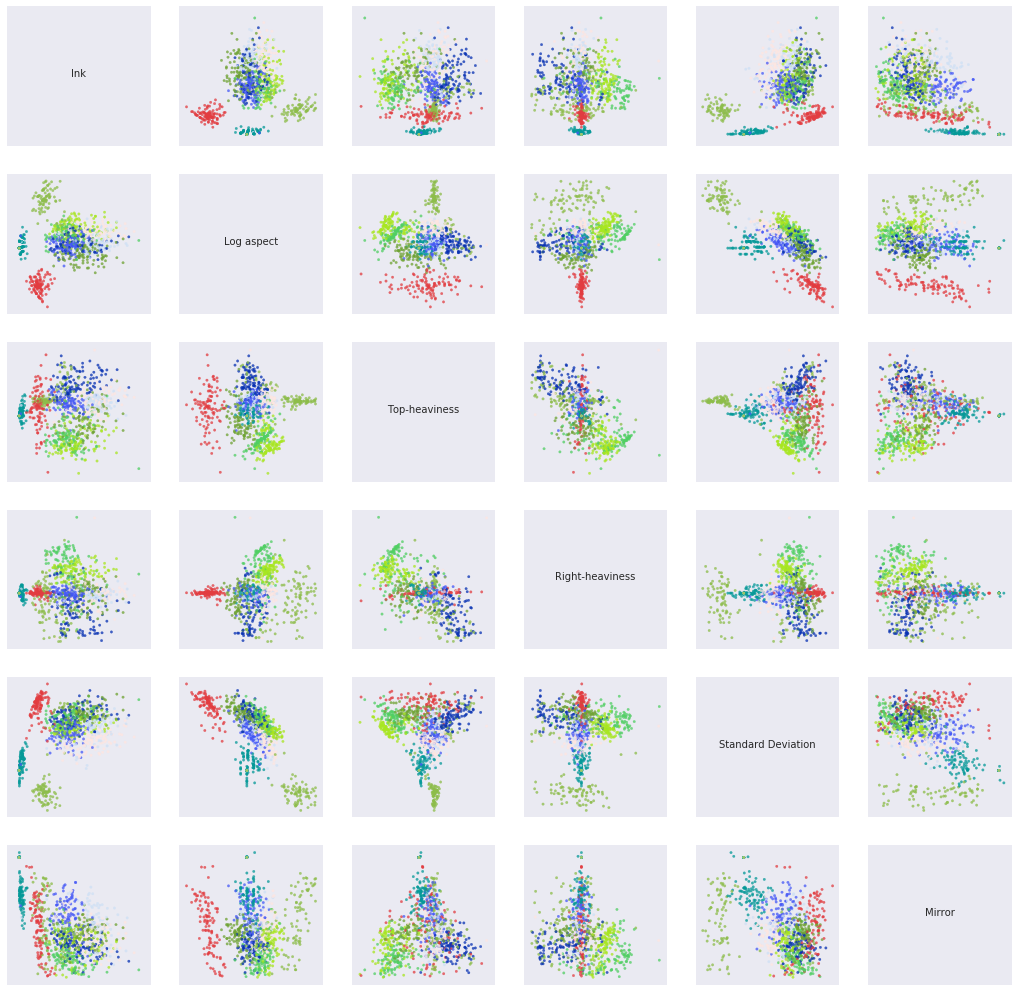

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
for i in range(d):
    for j in range(d):
        plt.subplot(d,d,i*d+j+1)
        if i==j: 
            plt.text(.5,.5,features[i],ha='center')
        else:
            plt.scatter(F[:,j], F[:,i], color=colors, alpha=0.75,s=6) 
        plt.xticks([])
        plt.yticks([])
    

## V. Conclusion :

When plotting the features of all characters into features space we see that we can distinguish some of the characters based on their feature. All same type of character tend to form cluster since they have almost similar features. From the above graph we can clearly differentiate 1 , (-) dash and (.) period. Although features implemented above doesn't exactly differentiate all the characters, we can increase the number of feature to distinguish better. 

## Vl. Reference :
http://blue.math.buffalo.edu/448/project5_f18.html

https://en.wikipedia.org/wiki/Feature_engineering

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.117.4836&rep=rep1&type=pdf
